# Assignment 2: Milestone I Natural Language Processing

<h3 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Task 2&3.<br>Feature Representation & Classification</strong></h3>

#### Student Name: Tran Ngoc Anh Thu
#### Student ID: s3879312

Date: "October 2, 2022"

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used (please go to `requirements.txt` file for further details)
* sklearn
* collections
* re
* numpy
* nltk
* itertools
* pandas
* os
* pylab
* collections

## Introduction

Machine and Algorithm can not understand lossing categorical data. Therefore, we should encode those text into numerical values using feature representation
We have pre-processed data in Task1. Once the text data is cleaned and tokenized it is ready for NLP analysis. Vectorization of the tokens allows us to mathematically represent text as vectors. There are numerous ways to create these vectors.


+ compare between ML models with different feature representation (count vector, weigthed and unweighted embedding models)

+ single model (e.g., logistic regression with count vector representation), and compare the performance with different amount of info. 

+ Unweighted, you just sum the word embeddings of an job ad as the representation of an job ad. 

+ Weighted sum, ou can do a weighted sum of word embeddings as representation instead of just sum.


### Multi-class classification 
+ Model: we will use Linear Model (Logistic Regression) combine with different attributes and feature representations. 
+ Model evaluation:K-fold cross-validation (5 folds here) to avoid overfitting the data
+ Metric: we will chose Accuracy to compare our models
> * `accuracy = correct_predictions / total_predictions`

## Steps
+ 2.1. Examining and loading data

+ 1.2. Basic Text Pre-processing
    * 1.2.1. Extract information from each job advertisement. Perform the following pre-processing steps to the description of each job advertisement;
    * 1.2.2. Tokenize each job advertisement description. The word tokenization must use the following regular expression:
    ```python
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?" 
    ```
    * 1.2.3. All the words must be converted into the lower case;
    * 1.2.4. Remove words with length less than 2.
    * 1.2.5. Remove stopwords using the provided stop words list (i.e, stopwords_en.txt). It is located inside the same downloaded folder.
    * 1.2.6. Remove the word that appears only once in the document collection, based on term frequency.
    * 1.2.7. Remove the top 50 most frequent words based on document frequency.
    * 1.2.8. Save all job advertisement text and information in txt file(s) 
    * 1.2.9. Build a vocabulary of the cleaned job advertisement descriptions, save it in a txt file (please refer to the required output)
    
+ 1.3. Summary
> * Discussion
      
+ 1.4. References


## Dataset
+ A small collection of job advertisement documents (around 776 jobs) inside the `data` folder.
+ Inside the data folder, there are four different sub-folders: Accounting_Finance, Engineering, Healthcare_Nursing, and Sales, representing a job category.
+ The job advertisement text documents of a particular category are in the corresponding sub-folder.
+ Each job advertisement document is a txt file named `Job_<ID>.txt`. It contains the title, the webindex (some will also have information on the company name, some might not), and the full description of the job advertisement.



## Importing libraries & packages

Install packages to the local environment for the whole project with `pip install -r requirements.txt`

In [79]:
!pip install gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec

# import code as a function
from src.utils import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# set desired matplotlib gloabal figure size
plt.rcParams["figure.figsize"] = (20,10)

In [39]:
# check the version of the main packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.23.1
Pandas version:  1.4.3
Python 3.10.4


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2 Feature Representation<br></strong></h3>

# 2.1 Examining and loading data

After doing any pre-processing in task1, we have several `.txt` files and a `.csv` file to further analysis

The loaded `job_ad.csb` is then a dictionary, with the following attributes:

| **ATTRIBUTES**        | **DESCRIPTION**                                        |
|-----------------------|--------------------------------------------------------|
| Webindex              | the 8 digit Id of the job advertisement on the website |
| Title                 | the Title of the advertised job position               |
| Tokenized Title       | the tokenized Title of the advertised job position     |
| Company               | the Company of the advertised job position             |
| Tokenized Company     | the tokenized Company of the advertised job position   |
| Description           | the description of each job advertisement              |
| Tokenized Description | the tokenized description of each job advertisement    |
| Category              | the category of the advertised job position            |

In [41]:
# Read job_ad.csv
job_ad = pd.read_csv('job_ad.csv')

# assign webindex
webindex = job_ad['Webindex']

# print first 3 rows
job_ad.head(3)

,Webindex,Title,Tokenized Title,Company,Tokenized Company,Description,Tokenized Description,Category
0,68997528,Finance / Accounts Asst Bromley to ****k,"['finance', 'accounts', 'asst', 'bromley', 'to...",First Recruitment Services,"['first', 'recruitment', 'services']",Accountant (partqualified) to **** p.a. South ...,"['accountant', 'partqualified', 'south', 'east...",Accounting_Finance
1,68063513,Fund Accountant Hedge Fund,"['fund', 'accountant', 'hedge', 'fund']",Austin Andrew Ltd,"['austin', 'andrew', 'ltd']",One of the leading Hedge Funds in London is cu...,"['leading', 'hedge', 'funds', 'london', 'recru...",Accounting_Finance
2,68700336,Deputy Home Manager,"['deputy', 'home', 'manager']",Caritas,['caritas'],An exciting opportunity has arisen to join an ...,"['exciting', 'opportunity', 'arisen', 'join', ...",Healthcare_Nursing


In [42]:
# read tokenized description from txt file
descriptionFile = './description.txt'
with open(descriptionFile) as f:
    tk_description = f.read().splitlines() # read all the descriptions into a list
    
print(len(tk_description))
type(tk_description)

776


list

#### Converting each description text string into list of tokens

In [43]:
tk_description = [description.split(" ") for description in tk_description] # note that we have to revert the join string into

# Explore the current statistics
stats_print(tk_description)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of description: 776
Average description length: 132.69974226804123
Maximum description length: 471
Minimum description length: 12
Standard deviation of description length: 70.3782402519735


#### Reading the corresponding category labels

In [44]:
# read the category of the job ad
categoryFile = './category.txt'
with open(categoryFile) as f:
    category = f.read().splitlines() # read all the category into a list
    
print(len(category))
type(category)

776


list

#### The distribution of the labels, how many description in a category

                    Webindex
Category                    
Accounting_Finance       191
Engineering              231
Healthcare_Nursing       198
Sales                    156


<AxesSubplot:xlabel='Category'>

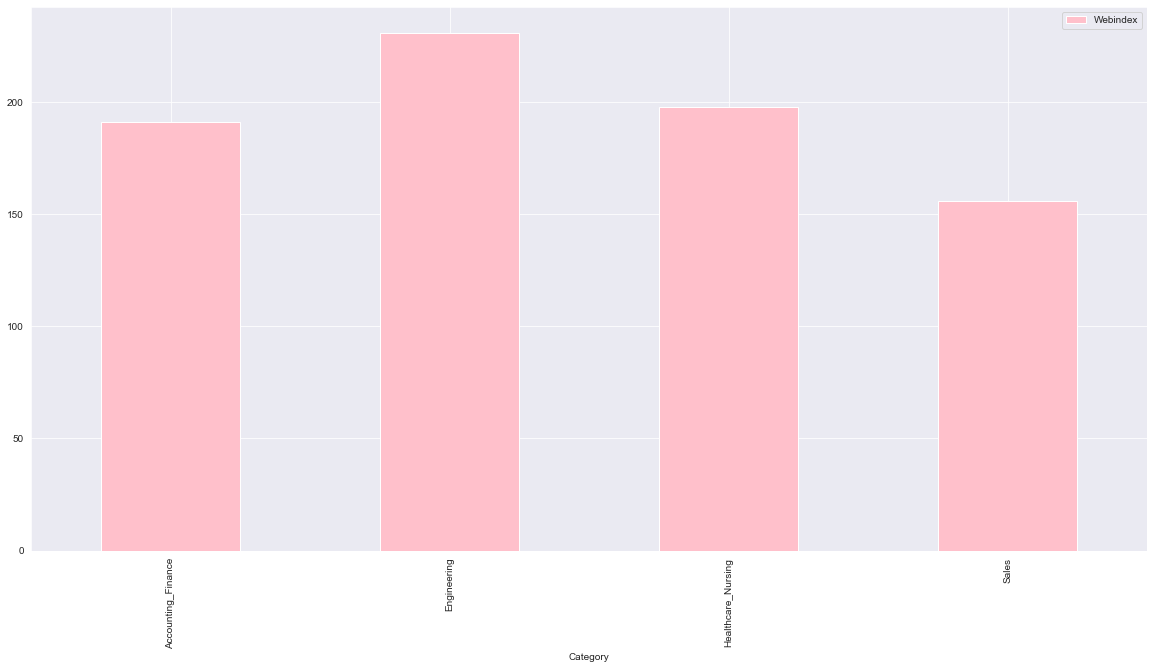

In [45]:
# number of description distribution across 4 categories
job_ad_subset = job_ad[['Webindex','Category']]
stats = job_ad_subset.groupby('Category').count()
print(stats)
stats.plot.bar(ylim=0, color='pink')

### ---------> OBSERVATION: 

The dataset contains relatively balanced labels because the distribution between job description across 4 categories is approximately equal.

#### Constructing the Vocabulary

We construct `vocab` sorted unique vocabulary below by converting the list of tokens to a **set**

In [47]:
# generating the vocabulary

# we put all the tokens in the corpus in a single list
words = list(chain.from_iterable(tk_description))
# set of unique words
vocab = sorted(list(set(words)))
# total number of the vocabulary
len(vocab)

5218

In [48]:
print(f'The number of the category: {len(category)}')
print(f'The number of the description: {len(tk_description)}')
print(f'The number of the unique tokens: {len(vocab)}')

The number of the category: 776
The number of the description: 776
The number of the unique tokens: 5218


### ----------> OBSERVATION:

We checked and know that we have adequate number of category and description

## Building Vector Representation

After text pre-processing has been completed, each individual document needs to be transformed into 
some kind of numeric representation that can be input into most NLP and text mining algorithms.
For example, classification algorithms, such as Support Vector Machine, can only take data in a 
structured and numerical form. They do not accept free language text.
A popular structured representation of text is the vector-space model, which represents each text/article
as a vector where the elements of the vector indicate the occurence of words within the text.

The vector-space model makes an implicit assumption that 
the order of words in a text document are not as
important as words themselves, and thus disregarded.
This assumpiton is called [**Bag-of-words**](https://en.wikipedia.org/wiki/Bag-of-words_model).

Given a set of documents and a pre-defined list of words appearing 
in those documents (i.e. a vocabulary), we can compute a vector representation for each document.
This vector representation can take one of the following three forms:
* a binary representation, each entry is either `word:0` (the word does not appear in the document; or `word:1` (the word appears in the document). We call this **binary vector representation**. 
* an integer count, each entry is `word:count`, telling how many times a word appear in a document. We call this **count vector representation**. 
* and a float-valued weighted vector, each entry is `word:weight`, telling a **weighted representative importance** of a word to a document. One of the most common weighted vectors used in natural language processing is called the *tfidf* vector. 

Given the cleaned up Job Advertisement, how can we generate those vectors for each document? 

Unfortunately, NLTK does not implement methods that directly produce those vectors.
Therefore, we will either write our own code to compute them or appeal to other data analysis libraries.

Here we are going to use [scikit-learn](http://scikit-learn.org/stable/index.html), an open source machine 
learning library for Python.
If you use Anaconda, you should already have scikit-learn installed, otherwise you will need to 
[install it](http://scikit-learn.org/stable/install.html) by following the instruction on its official website.

Although scikit-learn features various classification, regression and clustering algorithms
we are particularly interested in its feature extraction module, [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction).
This module is often used to "extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image." Please refer to its documentation on text feature extraction,
Section 6.2.3 of [Feature Extraction](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

In the following, we will demonstrate the usage of the following two classes:
* [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer): It converts a collection of text documents to a matrix of token counts. 
* [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer):
It converts a collection of raw documents to a matrix of TF-IDF features.


### 5.3 Generating TF-IDF Vectors

Finally, we will generate the TF-IDF Vector to represent each of the document.

Similar to the use of `CountVector`, we first initialise a `TfidfVectorizer` object by only specifying the value of "analyzer" and the vocabulary, and then covert the Job Advertisement into a list of strings, each of which corresponds
to a BBC News article.

### 7.4 Saving the Webindex

Oh sorry, one last thing..... we should also save the Webindex accordingly, so that we can easily retrieve the labels of the article in downstream analysis. 

A very important note that the Webindex is different from the article index here. 
The Webindex is given from the original dataset, as an identifier of an article. 
The article index we were talking about in a couple of places in this Jupyter Notebook is related to how we read and preprocess the data. 
Remember, at the beginning, we have read all the articles into a list `article_txts`, so the index here refers to the index of the article in the list  `article_txts`. 

Indeed, in this example, since the Webindex are integers, we should have make this more consistent (just in case...). 
This could be simply done by setting an order when we read the articles. 
The following code that we use before to loop through each of the article .txt file
```python
for filename in os.listdir(dir_path):
``` 
can be changed to: 
```python
for filename in sorted(os.listdir(dir_path)):
``` 

as such, we visit the article txt files in a sorted order according to their filename. &#128578; We will leave this for you to try and experience the difference. 

Though, in many other context, we might not have that much luck with the file naming :) Therefore, we should always learn to save the indexing we used.

In [21]:
out_file = open("./webindex.txt", 'w') # creates a txt file named 'webindex.txt' to save the id vector of each job ad
for a_ind in range(0, len(tk_description)):
    out_file.write("{}\n".format(webindex[a_ind])) # write the Webindex of each article
out_file.close() # close the file

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Generating Feature Representations</strong></h3>

from collections import Counter

"""
Bag-of-words model:
Generate the Count vector representation for each job advertisement description, and save
them into a file (please refer to the required output). Note, the generated Count vector
representation must be based on the generated vocabulary in Task 1 (as saved in vocab.txt).
"""
# bag of words model
def bag_of_words(description, vocab):
    # create a list of 0s with the same length as the vocab
    bow = [0] * len(vocab)
    # count the number of times each word appears in the description
    word_counts = Counter(description)
    # update the bow list with the word counts
    for word, count in word_counts.items():
        bow[vocab.index(word)] = count
    return bow

# Generate the Count vector representation for each job advertisement description
bow = [bag_of_words(description, vocab) for description in tk_description]

So let's say we do binary feature representation but with 3 types of data, the title, the description, and title+description.

# Generating Feature Vectors - Binary, Count, TF-IDF

In this task, we are going to generate feature vectors from tokenized review text. We are going to explore different feature vectors, including binary, count, and tf-idf vectors.

Binary, Count, TF-IDF

### Generating Binary Vectors
In this subtask, let's start with generating the binary vector representation for each review.
We need to first import the `CountVectorizer` and initialise it.

In [51]:
# binding the words together for each review
joined_description = [' '.join(review) for review in tk_description]

In [52]:
bVectorizer = CountVectorizer(analyzer = "word",binary = True,vocabulary = vocab) # initialise the CountVectorizer
binary_features = bVectorizer.fit_transform(joined_description)
binary_features.shape

(776, 5218)

In [53]:
# save the binary vector into txt file
bVector_file = "saved_txt_files/BinaryVectors/jobAd_bVector.txt" # file name of the binary vector
write_vectorFile(binary_features,bVector_file) # write the binary vector to file
print(f'Successfully saved {bVector_file} into the directory')

Successfully saved saved_txt_files/BinaryVectors/jobAd_bVector.txt into the directory


### Generating Count Vectors

Each word coresponding to a feature

In [54]:
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab) # initialised the CountVectorizer
count_features = cVectorizer.fit_transform(joined_description)
count_features.shape

(776, 5218)

In [55]:
count_array = count_features.toarray()

# get_feature_names_out return the vocabulary of unique words
df = pd.DataFrame(data=count_array,columns = cVectorizer.get_feature_names_out())
# print out samples
df.sample(3)

,aap,aaron,aat,abb,abenefit,aberdeen,abi,abilities,ability,abreast,...,years,yeovil,yn,york,yorkshire,youmust,young,younger,yrs,zest
483,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# save count vector into txt file
cVector_file = "saved_txt_files/CountVectors/jobAd_cVector.txt" # file name of the count vector
write_vectorFile(count_features,cVector_file) # write the count vector to file
print(f'Successfully saved {cVector_file} into the directory')

Successfully saved saved_txt_files/CountVectors/jobAd_cVector.txt into the directory


In [ ]:
# save count vector representation of job advertisement descriptions
with open('count_vectors.txt', 'w') as f:
    for i, description in enumerate(tk_description):
        f.write('#' + str(webindex[i]) + ',')
        for word in description:
            f.write(str(vocab.index(word)) + ':' + str(bow[i][vocab.index(word)]) + ',')
        f.write('\n')
    print(
        "Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file")

In [96]:
count_features = cVectorizer.fit_transform(joined_description).toarray()

def save_count_vector(count_features, webindex, filename):
    with open(filename, 'w') as f:
        for i in range(len(count_features)):
            f.write('#' + str(webindex[i]) + ',')
            for j in range(len(count_features[i])):
                if count_features[i][j] != 0:
                    f.write(str(j) + ':' + str(count_features[i][j]) + ',')
            f.write('\n')
    f.close()
    print('Count vector representation saved to ' + filename)


save_count_vector(count_features, webindex, 'count_vectors.txt')

Count vector representation saved to count_vectors.txt


### Task 5.3 Generating TF-IDF Vectors


In this subtasks, you are required to generate the count vector features of review texts.



TF-IDF also gives larger values for less frequent words and is high when both IDF and TF values are high i.e the word is rare in all the documents combined but frequent in a single document.

In [57]:
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform(joined_description) # generate the tfidf vector representation for all articles
tfidf_features.shape

(776, 5218)

In [58]:
tVector_file = "saved_txt_files/TfidfVectors/jobAd_tVector.txt" # file name of the tfidf vector

write_vectorFile(tfidf_features,tVector_file) # write the tfidf vector to file
print(f'Successfully saved {tVector_file} into the directory')

Successfully saved saved_txt_files/TfidfVectors/jobAd_tVector.txt into the directory


## Task 6. Training Logistic Regression Models for label Classification

In this final task, you are required to bulid logistic regression models based on different feature vectors (binary, count and tfidf vectors), explore the cases where the model produced false predictions, and evaluate the performance of the model using a 5-fold cross-validation.

In the following, we first uses count vector features as an example to bulid a logistic regression model and  explore the preformance of the model:

In [59]:
# set seed number to ensure the output is reproducible
seed = 3879312

X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_features, category, list(range(0,len(category))),test_size=0.2, random_state=seed)

max_iter = 1000 # this is a relative harder problem and we have to increase the maximum iteration parameter of the logistic regression model.

model = LogisticRegression(random_state=seed,max_iter=max_iter, multi_class='multinomial') # initial a logistic regression model
model.fit(X_train, y_train) # fit the model
model.score(X_test, y_test) # calculated the accuracy score on the test data

0.8589743589743589

Looking at the confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 70.0, 'Predicted')

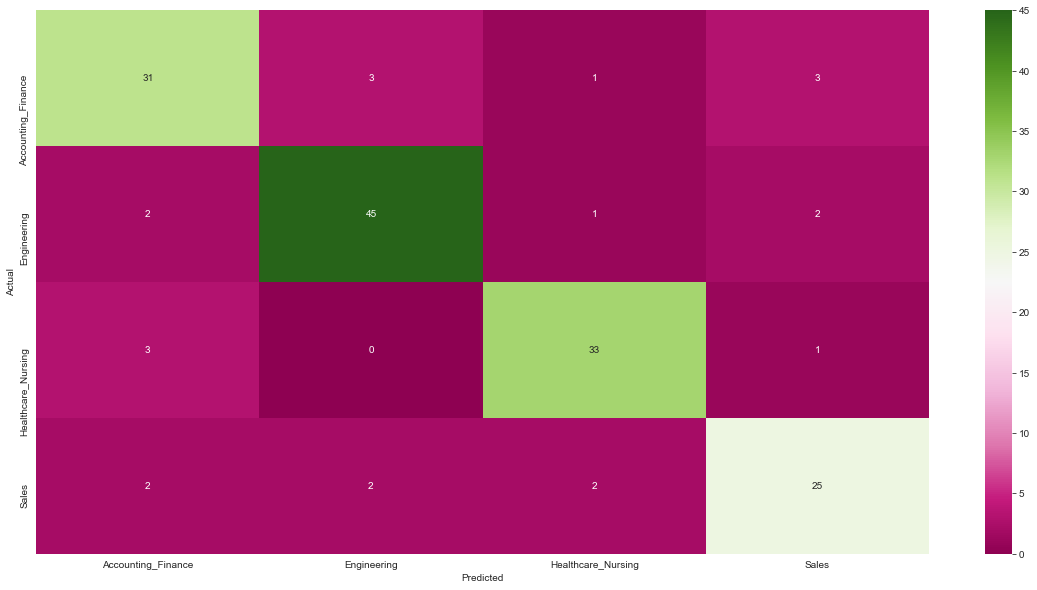

In [61]:
categories = ['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales'] # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories, cmap="PiYG") # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

### 5-Fold Cross Validation

In [63]:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) # initialise a 5 fold validation
print(kf)

KFold(n_splits=5, random_state=3879312, shuffle=True)


In [64]:
def evaluate(X_train,X_test,y_train, y_test,seed):
    model = LogisticRegression(random_state=seed,max_iter = 1000)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [65]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

num_models = 3
cv_df = pd.DataFrame(columns = ['binary','count','tfidf'],index=range(num_folds)) # creates a dataframe to store the accuracy scores in all the folds

fold = 0
for train_index, test_index in kf.split(list(range(0,len(category)))):
    y_train = [str(category[i]) for i in train_index]
    y_test = [str(category[i]) for i in test_index]

    X_train_binary, X_test_binary = binary_features[train_index], binary_features[test_index]
    cv_df.loc[fold,'binary'] = evaluate(binary_features[train_index],binary_features[test_index],y_train,y_test,seed)

    X_train_count, X_test_count = count_features[train_index], count_features[test_index]
    cv_df.loc[fold,'count'] = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed)

    X_train_tfidf, X_test_tfidf = tfidf_features[train_index], tfidf_features[test_index]
    cv_df.loc[fold,'tfidf'] = evaluate(tfidf_features[train_index],tfidf_features[test_index],y_train,y_test,seed)

    fold +=1

Printing the result of each fold for each vector representation:

In [66]:
cv_df

,binary,count,tfidf
0,0.833333,0.858974,0.858974
1,0.896774,0.890323,0.903226
2,0.890323,0.890323,0.890323
3,0.890323,0.896774,0.916129
4,0.870968,0.883871,0.929032


In [67]:
cv_df.mean()

binary    0.876344
count     0.884053
tfidf     0.899537
dtype: float64

### ------------> OBSERVATION:

We can see 3 features representation works on the model give a good Accuracy score (all are above 80%)


<br>
<hr>


<h3 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Task 3. Classification with Word Embedding Models</strong></h3>

In the previous activity, we ahve explore a few language models and word embedings, including:

Pre-trained embedding:
- `bbcFT_wv`: FastText embeddings pre-trained from Genism


In this activity, we are going to use them for document classification.
Before we use, we will need to load them in this activity notebook one by one, and for each, we will need to construct the document representation, i.e., document embeddings based on the word embeddings.



# Document Classification with Word Embeddings

In this previous activity, we have enough fun playinng around the word embeddings.
Now, we get to the stage that we will make real use of them, i.e., we are going to build on these embeddings machine learing models for document classification. 😊


## The Dataset
Same as in the previous activity, the document collection that we are going to use is the BBC News Dataset. For the origin of the dataset, please refer to [here](http://mlg.ucd.ie/datasets/bbc.html)
To be brief, the dataset consists of 2225 documents from the BBC news website corresponding to stories in five topical areas, i.e., class Labels (business, entertainment, politics, sport, tech).

In this activity, instead of using the raw dataset, we will utilised the pre-processed clean dataset we saved in our previous Activity 3 Generating Feature Vectors.
Recall that at the end of Activity 3, we saved the pre-processed articles in a txt file named `bbcNews.txt`, where, each row is a document, with tokens seperated by whitespace.

Before continue, please make sure you have the following files in the same folder as this jupyter notebook:
* `bbcNews.txt`: contains the pre-process BBC news articles
* `labels.csv`: contains the label/class of each article.

In [69]:
# logging for event tracking
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Let's read in the labels and article data, and construct a single dataframe to store them correspondingly.
Note that the order of the articles are the same as the labels data, as they are all in sorted order of document names.

### 1.1 Understand your task by tSNE

Alright! so we have the document embedding vector representation for each article now, we can proceed to the task of document classification.
Before, we move on, a good habbit is to explore and understand how difficult the task is, whether there are too much noise in the data, making it impossible to clearly separate each category.

One way to confirm that the feature space we are using is representative enough for our task (classifying articles into separate labels) to be solvable is to use dimensionality-reduction techniques: These methods project a high-dimensional vector into a lower number of dimensions, with different guarantees on this projection according to the method used.
In this activity, we will use [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), a popular dimensionality reduction technique used in many fields, including NLP.

Since we will do the same thing again and again when we try other embeddings, we will construct a function to do this again.
The following function `plotTSNE` takes the following arugments:
* labels, the lable/category of each article
* features, a numpy array of document embeddings, each for an article.

and projects the feature/document embedding vectors in a 2 dimension space and plot them out.
It does the following:
1. get the set of classes, called `categories` (5 categories)
2. sample 30% of the data/document embeddings randomly, and record the indices selected
3. project the selected document embeddings in 2 dimensional space using tSNE, each document embedding now corresponds to a 2 dimensional vector in `projected_features`
4. plot them out as scatter plot and highlight different categories in different color

In [8]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import numpy as np
# def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of an article
#     categories = sorted(labels.unique())
#     # Sampling a subset of our dataset because t-SNE is computationally expensive
#     SAMPLE_SIZE = int(len(features) * 0.3)
#     np.random.seed(0)
#     indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
#     projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
#     colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
#     for i in range(0,len(categories)):
#         points = projected_features[(labels[indices] == categories[i])]
#         plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
#     plt.title("Feature vector for each article, projected on 2 dimensions.",
#               fontdict=dict(fontsize=15))
#     plt.legend()
#     plt.show()

Oh! Not bad, there are a bit of noises, but overall, seems an easy one, the different categories are quite nicely seperated! Well~ if you remember this dataset prevoiusly, you would have a rough idea anyway, with the binary/count/tfijob_ad vector representation, we have accuracy above 95% 😊
Ok, now, let's move on to the serious task: Document Classfication

## 3. FastText model trained on BBC News data

Finally, we experiment the FastText embeddings.
Similar, we:
* load the FastText model saved in our prevoius activity;
* generate document embeddings based on the load FastText word embeddings;
* explore the reprensentiveness of the features through tSNE;
* bulid the logistic regression model based on the generated document embeddings for news classfication.

In [9]:
# # loading the trained Fasttext model based on bbc News data
# from gensim.models.fasttext import FastText

# # Defining values for parameters
# embedding_size = 200
# window_size = 5
# min_word = 5
# down_sampling = 1e-2

# %time
# bbcFT = FastText(tk_description,
#                       vector_size=embedding_size,
#                       window=window_size,
#                       min_count=min_word,
#                       sample=down_sampling,
#                       workers = 5,
#                       sg=1,
#                       epochs=100)

# print(bbcFT)

In [72]:
# save model
fast_text_model_file = 'fast_text_model'

# # Save fastText gensim model
# bbcFT.save("models/FastText/fast_Text_model")
# print(f'Successfully loaded {fast_text_model_file}')

# Load saved gensim fastText model
bbcFT = Word2Vec.load("models/FastText/fast_Text_model")

2022-10-02 21:48:37,191 : INFO : loading Word2Vec object from models/FastText/fast_Text_model
2022-10-02 21:48:37,200 : INFO : loading wv recursively from models/FastText/fast_Text_model.wv.* with mmap=None
2022-10-02 21:48:37,201 : INFO : loading vectors_ngrams from models/FastText/fast_Text_model.wv.vectors_ngrams.npy with mmap=None
2022-10-02 21:48:38,795 : INFO : setting ignored attribute vectors to None
2022-10-02 21:48:38,802 : INFO : setting ignored attribute buckets_word to None
2022-10-02 21:48:39,127 : INFO : setting ignored attribute cum_table to None
2022-10-02 21:48:39,168 : INFO : FastText lifecycle event {'fname': 'models/FastText/fast_Text_model', 'datetime': '2022-10-02T21:48:39.168182', 'gensim': '4.2.0', 'python': '3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'loaded'}


In [81]:
# NOTE this can take some time to finish running
# generate document embeddings
bbcFT_wv = bbcFT.wv
bbcFT_dvs = gen_docVecs(bbcFT_wv,job_ad['Tokenized Description'])
bbcFT_dvs.isna().any().sum()

0

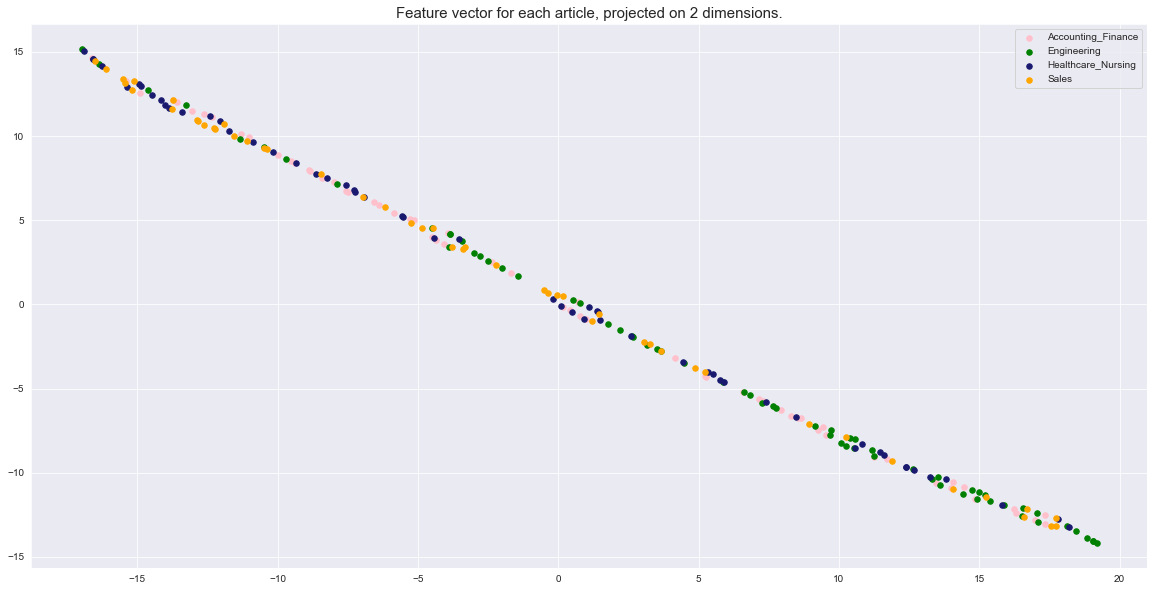

In [82]:
# explore feature space
features = bbcFT_dvs.to_numpy()
plotTSNE(job_ad['Category'],features)

### --------> OBSERVATION:

The unweighted embeding model seems does not do a good job of classifying features into their appropriate categories

In [83]:
# build the classification model and report results
seed = 3879312
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(bbcFT_dvs, job_ad['Category'], list(range(0,len(job_ad))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.35019455252918286

## 4. Generating TF-IDF weighted document vectors

Ok, I hope you have lots of fun building document embeddings based on varoius word embedding models.
Previously, when we generate the document embeddings, we just sum up the embeddings vector of each tokenized word in the article, a bit simplicity 🤔

In this section, let's make it a bit more challenging, we are going to build the tf-idfdocument embeddings.
What does that mean? 🤨
Hmm~~ it's not magic, we just do a weigthed sum of the word embedding vectors, however, the weight here, refers to the tf-idfweight of the word.

If you already forgot about what is `tf-ijob_ad`, please refer to Activity 3 Pre-processing Text and Generating Features.
Otherwise, move on!
So we've generated the tf-idfvector representation of documents in Activity 3 and saved in a txt file called `bbcNews_tVector.txt`. The format of this file is:
- each line represents an article;
- each line is of the format 'w_index:weight w_index:weight ......'

Oh, but we don't have that word index `w_index` here in this activity, what should we do? 🤔
ah ha, we also saved the vocabulary in a file `vocab`, in which each line is a word, and of the format `index,word`.
Theresore, based on these two files, we can create a word:weight mapping for each tokenized word in a document!

Ok, in the following couple block of codes, this is exactly what we are trying to do, step by step.
- the `gen_vocIndex` function reads the the vocabulary file, and create an w_index:word dictionary

In [84]:
def read_vocab(vocab_file):
    vocab = {}
    with open(vocab_file) as f:
        for line in f:
            (word, index) = line.split(':')
            vocab[word.strip()] = int(index)
    return {v: k for k, v in vocab.items()}

# Generates the w_index:word dictionary
voc_fname = 'vocab.txt'
voc_dict = read_vocab(voc_fname)
voc_dict

{0: 'aap',
 1: 'aaron',
 2: 'aat',
 3: 'abb',
 4: 'abenefit',
 5: 'aberdeen',
 6: 'abi',
 7: 'abilities',
 8: 'ability',
 9: 'abreast',
 10: 'abroad',
 11: 'absence',
 12: 'absolute',
 13: 'ac',
 14: 'aca',
 15: 'academic',
 16: 'academy',
 17: 'acca',
 18: 'accept',
 19: 'acceptable',
 20: 'acceptance',
 21: 'accepted',
 22: 'access',
 23: 'accessible',
 24: 'accident',
 25: 'accommodates',
 26: 'accommodation',
 27: 'accomplished',
 28: 'accordance',
 29: 'account',
 30: 'accountabilities',
 31: 'accountability',
 32: 'accountable',
 33: 'accountancy',
 34: 'accountant',
 35: 'accountants',
 36: 'accounting',
 37: 'accounts',
 38: 'accreditation',
 39: 'accredited',
 40: 'accruals',
 41: 'accuracy',
 42: 'accurate',
 43: 'accurately',
 44: 'achievable',
 45: 'achieve',
 46: 'achieved',
 47: 'achievement',
 48: 'achievements',
 49: 'achiever',
 50: 'achieving',
 51: 'acii',
 52: 'acquired',
 53: 'acquisition',
 54: 'acquisitions',
 55: 'act',
 56: 'acting',
 57: 'action',
 58: 'action

- the `doc_wordweights` function takes the tfijob_ad document vector file, as well as the w_index:word dictionary, creates the mapping between w_index and the actual word, and creates a dictionary of word:weight or each unique word appear in the document.

In [85]:
def doc_wordweights(fName_tVectors, voc_dict):
    tfidf_weights = [] # a list to store the  word:weight dictionaries of documents

    with open(fName_tVectors) as tVecf:
        tVectors = tVecf.read().splitlines() # each line is a tfidf vector representation of a document in string format 'word_index:weight word_index:weight .......'
    for tv in tVectors: # for each tfidf document vector
        tv = tv.strip()
        weights = tv.split(' ') # list of 'word_index:weight' entries
        weights = [w.split(':') for w in weights] # change the format of weight to a list of '[word_index,weight]' entries
        wordweight_dict = {voc_dict[int(w[0])]:w[1] for w in weights} # construct the weight dictionary, where each entry is 'word:weight'
        tfidf_weights.append(wordweight_dict)
    return tfidf_weights

fName_tVectors = 'jobAd_tVector.txt'
tfijob_ad_weights = doc_wordweights(fName_tVectors, voc_dict)

# take a look at the tfijob_ad word weights dictionary of the first document
tfijob_ad_weights[0]

{'terms': '0.12814828244060425',
 'successful': '0.05796079997740923',
 'south': '0.2018635293730571',
 'skills': '0.04913453192908334',
 'service': '0.060710119751583795',
 'sales': '0.06454174417506445',
 'role': '0.12135675890098277',
 'requirement': '0.12239855316060116',
 'reconciliation': '0.13890102583022776',
 'qualified': '0.07659552107697486',
 'purchase': '0.13378223582062956',
 'previous': '0.08075436746078549',
 'possess': '0.10743973778148354',
 'phone': '0.11676459978057582',
 'person': '0.08859627508123877',
 'permanent': '0.08005535336313394',
 'payment': '0.13538699349642683',
 'partqualified': '0.16974524253473644',
 'part': '0.07041212519192294',
 'offices': '0.1128037312357935',
 'negotiating': '0.15654960114068633',
 'modern': '0.1294543605339772',
 'manufacturing': '0.09525384009006171',
 'london': '0.16491288212112942',
 'letter': '0.12570538443617763',
 'ledger': '0.2675644716412591',
 'ideal': '0.08620541715836426',
 'handling': '0.23888098357149493',
 'fully'

Ok, once we have the word:weight dictionary of each document, now we can construct the tf-idf weighted document embeddings.
* the following `gen_docVecs` function is an revision/extension of the previous written function, that takes the word embeddings dictionary, the tokenized text of articles, and the tfijob_ad weights (list of word:weight dictionaries, one for each article) as arguments, and generates the document embeddings:
 1. creates an empty dataframe `docs_vectors` to store the document embeddings of articles
  2. it loop through every tokenized text:
    - creates an empty dataframe `temp` to store all the word embeddings of the article
    - for each word that exists in the word embeddings dictionary/keyedvectors,
        - if the argument `tfijob_ad` weights are empty `[]`, it sets the weight of the word as 1
        - otherwise, retrieve the weight of the word from the corresponding word:weight dictionary of the article from  `tfijob_ad`
    - row bind the weighted word embedding to `temp`
    - takes the sum of each column to create the document vector, i.e., the embedding of an article
    - append the created document vector to the list of document vectors

Ok we now have everything ready to generate the weight document embeddings.
We can do this on any of our previous explored models, including the pretrained Word2Vec GoogleNews300, Glove, our in-house trained Word2Vec and FastText.

Let's generated the weighted version of the document embedding vectors first

In [87]:
weighted_bbcFT_company = gen_docVecs_weight(bbcFT_wv,job_ad['Tokenized Company'],tfijob_ad_weights)
weighted_bbcFT_title = gen_docVecs_weight(bbcFT_wv,job_ad['Tokenized Title'],tfijob_ad_weights)
weighted_bbcFT_description = gen_docVecs_weight(bbcFT_wv,job_ad['Tokenized Description'],tfijob_ad_weights)

And we can do very much the same thing as what we do before for other models.
Here, we will do this as loops, for each model:
- we plot out the feature vectors  projected in a 2-dimensional space,then
- we build the logistic regression model for document classfication and report the model performance.

In [88]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of an article
    categories = sorted(labels.unique())
    # Sampling a subset of our dataset because t-SNE is computationally expensive
    SAMPLE_SIZE = int(len(features) * 0.3)
    np.random.seed(0)
    indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices].astype(int))
    colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
    for i in range(0,len(categories)):
        points = projected_features[(labels[indices] == categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
    plt.title("Feature vector for each article, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    plt.legend()
    plt.show()

In [89]:
%matplotlib inline
seed = 0
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

models = [weighted_bbcFT_company,weighted_bbcFT_title,weighted_bbcFT_description]
model_names = ["Weighted Pretrained FastText with Company", "Weighted Pretrained FastText with Title", "Weighted Pretrained FastText with Description"]
for i in range(0,len(models)): #loop through each model
    dv = models[i]
    name = model_names[i]
    features = dv.to_numpy() # convert the dataframe stored features to an numpy array
    print(len(features))
    # print(name + ": tSNE 2 dimensional projected Feature space")
    # plotTSNE(job_ad['Category'],features)

    # creating training and test split
    X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(dv, job_ad['Category'], list(range(0,len(job_ad))),test_size=0.33, random_state=seed)

    model = LogisticRegression(max_iter = 2000,random_state=seed)
    X_train = np.array(X_train).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    model.fit(X_train, y_train)
    print("Accuracy: ", model.score(X_test, y_test))
    print('\n\n')

0


ValueError: Found input variables with inconsistent numbers of samples: [0, 776, 776]

In [97]:
models = [weighted_bbcFT_company,weighted_bbcFT_title,weighted_bbcFT_description]
model_names = ["Weighted Pretrained FastText with Company", "Weighted Pretrained FastText with Title", "Weighted Pretrained FastText with Description"]
for i in range(0,len(models)):
    model = models[i]
    name = model_names[i]
    features = dv.to_numpy() # convert the dataframe stored features to an numpy array
    print(len(features))
    # creating training and test split
    X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(dv, job_ad['Category'], list(range(0,len(job_ad))),test_size=0.33, random_state=seed)
    model = LogisticRegression(max_iter = 2000,random_state=seed)
    model.fit(X_train, y_train)
    print(model_names[i] + " Accuracy: " + str(model.score(X_test, y_test)))

0


ValueError: Found input variables with inconsistent numbers of samples: [0, 776, 776]

In [100]:
%matplotlib inline
seed = 0
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

models = weighted_bbcFT_description
model_names = "Weighted Pretrained FastText with Description"

dv = models
name = model_names
features = dv.to_numpy() # convert the dataframe stored features to an numpy array
print(len(features))
print(name + ": tSNE 2 dimensional projected Feature space")
plotTSNE(job_ad['Category'],features)

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(dv, job_ad['Category'], list(range(0,len(job_ad))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 2000,random_state=seed)
# X_train = np.array(X_train).reshape(-1, 1)
# y_train = np.array(y_train).reshape(-1, 1)
# y_test = np.array(y_test).reshape(-1, 1)
# X_test = np.array(X_test).reshape(-1, 1)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))
print('\n\n')

0
Weighted Pretrained FastText with Description: tSNE 2 dimensional projected Feature space


IndexError: arrays used as indices must be of integer (or boolean) type

In [101]:
type(features)

numpy.ndarray

In [102]:
job_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Webindex               776 non-null    int64 
 1   Title                  776 non-null    object
 2   Tokenized Title        776 non-null    object
 3   Company                689 non-null    object
 4   Tokenized Company      776 non-null    object
 5   Description            776 non-null    object
 6   Tokenized Description  776 non-null    object
 7   Category               776 non-null    object
dtypes: int64(1), object(7)
memory usage: 48.6+ KB


#### Note: Creating tfijob_ad weighted document embeddings using Gensim

In the previous sections, we tried very hard to create the tfijob_ad weighted document embeddings using the generated tf-idfweights save in previous activity.
Indeed, we can using Genism to do this direction, and it's indeed, a bit less effor required 😑 Will show you below.
We will use the in-house build Word2Vec model as an example.

In [103]:
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel

# we have two vocabularies here, one from the in-house bulit Word2Vec, the other from the articles
# note that althought the Word2Vec is built on the same dataset, but they might have done further
# pre-processing during model build (e.g., setting min_count), and thus, might create mismatch in the two vocabularis.
# therefore, we remove tokenized words that doesn't exist in the keyedvectors in the Word2Vec keyedvectors
processed_text = [[w for w in t if w in bbcFT_wv.index_to_key] for t in job_ad['Tokenized Description']]

# use the Gensim package to create a dictionary that encapsulates the mapping between normalized words and their integer ids.
docs_dict = Dictionary(processed_text) # creates a dictionary from the text
docs_dict.filter_extremes(no_below=5) # filtering words that appear less than 5 times
docs_dict.compactify() # assign new word ids to all words, shrinking any gaps.

2022-10-02 22:26:56,119 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-10-02 22:26:56,124 : INFO : built Dictionary<0 unique tokens: []> from 776 documents (total 0 corpus positions)
2022-10-02 22:26:56,125 : INFO : Dictionary lifecycle event {'msg': 'built Dictionary<0 unique tokens: []> from 776 documents (total 0 corpus positions)', 'datetime': '2022-10-02T22:26:56.125056', 'gensim': '4.2.0', 'python': '3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2022-10-02 22:26:56,125 : INFO : discarding 0 tokens: []...
2022-10-02 22:26:56,126 : INFO : keeping 0 tokens which were in no less than 5 and no more than 388 (=50.0%) documents
2022-10-02 22:26:56,126 : INFO : resulting dictionary: Dictionary<0 unique tokens: []>


In [104]:
# see what are the words that been get rid off when we do the fliter
[w for w in bbcFT_wv.index_to_key if w not in docs_dict.values()]

['experience',
 'sales',
 'role',
 'work',
 'business',
 'team',
 'working',
 'job',
 'care',
 'skills',
 'company',
 'client',
 'management',
 'manager',
 'support',
 'uk',
 'service',
 'excellent',
 'development',
 'required',
 'based',
 'opportunity',
 'services',
 'knowledge',
 'apply',
 'successful',
 'training',
 'design',
 'engineering',
 'recruitment',
 'customer',
 'salary',
 'candidate',
 'clients',
 'high',
 'join',
 'ability',
 'strong',
 'provide',
 'home',
 'ensure',
 'leading',
 'including',
 'engineer',
 'financial',
 'good',
 'staff',
 'position',
 'systems',
 'full',
 'time',
 'cv',
 'quality',
 'www',
 'key',
 'benefits',
 'requirements',
 'opportunities',
 'project',
 'environment',
 'career',
 'contact',
 'essential',
 'candidates',
 'information',
 'nursing',
 'employment',
 'level',
 'people',
 'market',
 'responsible',
 'technical',
 'include',
 'industry',
 'professional',
 'communication',
 'part',
 'develop',
 'experienced',
 'customers',
 'senior',
 'posted'

In [105]:
len(docs_dict.keys())

0

This process yields a vocabulary with 8647 words.
Then we use Gensim again to create a bag-of-words representation of each document, i.e., the tf-idfvector for each document.


In [106]:
import numpy as np
from gensim.matutils import sparse2full

docs_corpus = [docs_dict.doc2bow(doc) for doc in job_ad['Tokenized Description']] # convert corpus to Bag of Word format
model_tfidf = TfidfModel(docs_corpus, id2word=docs_dict) # fit the tfijob_ad model
# apply model to the list of corpus document,
# so each document is a list of tuples, (word_index, weight) for each word appears in the document
docs_tfidf  = model_tfidf[docs_corpus]

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [ ]:
# see for example, the tfijob_ad weights of the words in the 2nd document
docs_tfidf[1]

We can then transfer `docs_tfidf` to matrix form. `vstack` function from numpy can stack arrays in sequence vertically (row wise), and `sparse2full` function convert a document in sparse document format (in size of the number of words in the document) into a dense numpy array (of size of the vocabulary)

In [ ]:
docs_vecs   = np.vstack([sparse2full(c, len(docs_dict)) for c in docs_tfidf])

In [ ]:
docs_vecs.shape

In [ ]:
docs_vecs[0]

The result, `docs_vecs`, is a matrix with 2225 rows (docs) and 8647 columns (tf-idfterms).

Let's see the performance of this tf-idfvector:

In [ ]:
# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(docs_vecs, job_ad['Category'], list(range(0,len(job_ad))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

Wow~ quite good!

Now try to use this tfijob_ad vector to create the weighted document embeddings.

Be careful, the vocabulary are different, for instance,

In [ ]:
# see how many words are encoded in our in-house Word2Vec model?
len(bbcFT_wv.index_to_key)

In [ ]:
# how about the tfijob_ad vector?
len(docs_dict)

We only care about words that are in both vocabulary.
In the following, we creates the word embeddings arrays for words exists in docs_dict

In [ ]:
word_emb_vecs = np.vstack([bbcFT_wv[docs_dict[i]] for i in range(len(docs_dict)) if docs_dict[i] in bbcFT_wv.index_to_key])

In [ ]:
word_emb_vecs.shape

In [ ]:
word_emb_vecs[0]

Now we can do the dot product of the two vectors and get our tfijob_ad weighted document embeddings:

In [ ]:
tfijob_ad_docs_emb = np.dot(docs_vecs, word_emb_vecs)

In [ ]:
# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(tfijob_ad_docs_emb, job_ad['Category'], list(range(0,len(job_ad))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

Not much difference from the one we did ourselves (refer to the performance of the `Weighted In-house Word2Vec`.
Comparing the performance of the tfijob_ad weighted document emeddings with our in-house built Word2Vec and the non-weighted on (referring to Section 2), adding the tfijob_ad weight indeed worsen the results in this example.
Indeed, in this example, the most simply bag-of-word tfijob_ad vector representatino words much better, i.e., 0.978 accuracy 😆

> **Discussion**
Does adding the tfijob_ad weight to construct document embedding and/or having a more complicated model guarantees higher performance?


Cool! 🤩 It gets the right class (I hope you got the same, but maybe you have different results....)
Try as many as you want and have fun! 😊

If you run the infer_vecotr multiple time, every time you get a different vector. and thus, when you predict the class based on the different document vectors, you may get different results. 🤪 🤪 🤪
Refer to the answer of the [this question](https://github.com/RaRe-Technologies/gensim/wiki/recipes-&-faq#q12-ive-used-doc2vec-infer_vector-on-a-single-text-but-the-resulting-vector-is-different-each-time-is-there-a-bug-or-have-i-made-a-mistake-doc2vec-inference-non-determinism) to understand why.


In [ ]:
import os

# The .py format of the jupyter notebook
for fname in os.listdir():
    if fname.endswith('ipynb'):
        os.system(f'jupyter nbconvert {fname} --to python')

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Summary</strong></h3>

+ there are 3 different types of feature representation of documents that you need to
build in this task, including count vector, two document embeddings (one TF-IDF weighted, and one
unweighted version).

+ Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.
Bag of Words vectors are easy to interpret. However, TF-IDF usually performs better in machine learning models.

+ The idea of TF-IDF is to reflect the importance of a word to its document or sentence by normalizing the words which occur frequently in the collection of documents. Recall task1, we also did a similar task by re,o,ving the top 50 most frequent words based on document frequency becase a word appears in almost every document means it’s not significant for the classification.

+ The Binary, Count, and TF-IDF models completely depends on the frequency of occurrence, it doesn’t take the semantic similarities between words into consideration (e.g. equal and identical)

> # Discussion

>> * Drawbacks of using a Bag-of-Words model is computationally expensive: If the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too. Additionally, the vectors would also contain many 0s, thereby resulting in a sparse matrix (which is what we would like to avoid). We are retaining no information on the grammar of the sentences nor on the ordering of the words in the text.

>> * Task 2 only consider Unigrams (the single unique words in a sentence) which would lead to misleading for words the meaning is constructed by 2 or above number of words. Therefore, we would consider to implement Bigrams, or Trigrams.

>> * The downstream analysis will determine how we should treat the text. Should we pre-process the `title` information if we put it into the classification model? Or ought we only concentrate on the `description` itself? Based on the analytical work's objectives, we can choose the appropriate downstream analysis task. For instance, we may use the whole document when doing tasks like document classification and clustering. In contrast, performing functions like document summary and information retrieval, a smaller unit, such as a paragraph or phrase, may be used.

# Reference

+ https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
+ https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63
+ https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
+ [FastText paper from Facebook](https://arxiv.org/pdf/1607.04606.pdf)
+ Gensim’s fastText. https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py
+ https://thinkinfi.com/fasttext-word-embeddings-python-implementation/
[1] [TFIDF with Word Embeddings](https://github.com/ytnvj2/DocumentEmbedding/blob/master/TFIDFwithEmbeddings.ipynb)  
[2] [Problem-solving with ML: automatic document classification](https://cloud.google.com/blog/products/ai-machine-learning/problem-solving-with-ml-automatic-document-classification)     
[3] [Creating TF-IDF Weighted Word Embeddings](http://dsgeek.com/2018/02/19/tfidf_vectors.html)    
[4] [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)